<div style="font-family: Calibri; font-size: 16px; background-color: #ccd5ae; padding: 10px 10px;">
    <h1>Exploratory Data Analysis</h1>
</div>

In [7]:
# Data packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
import warnings
from sklearn import set_config
from scripts.utility import print_json
from scripts.plot import univariate_plot
from sklearn.preprocessing import StandardScaler
import constants.constants as plot
from scripts.plot import univariate_plot, bivariate_plots, bivariate_gridplot, bivariate_gridplot_alpha, bivariate_gridplot_category

In [8]:
warnings.filterwarnings("ignore") 
set_config(display='diagram')
pd.options.display.precision=3
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
train_df = pd.read_csv("data/train.csv" )

In [10]:
train_df.shape

(255347, 18)

In [11]:
train_df.sample(5)

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
5269    Y1CQBSC5Y8   24  123435      115234          595              76   
91379   MYVUVCIQ5A   61  130006      240515          699               0   
2393    2MQEZG3IK3   50   67635      159531          658              12   
222456  HGZ8N51O8O   62  140226      154580          580              93   
230197  UELVF2T1RR   36  134105      113202          463              72   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
5269                 4        13.720        48     0.500  High School   
91379                2        12.540        36     0.830  High School   
2393                 3        19.660        60     0.790     Master's   
222456               4        24.470        60     0.470          PhD   
230197               1        21.240        48     0.360   Bachelor's   

       EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
5269       Unemployed      Divorced          No           Yes        Home   
91379      Unemployed       Married         Yes           Yes   Education   
2393       Unemployed       Married         Yes           Yes    Business   
222456  Self-employed      Divorced          No            No        Auto   
230197      Part-time       Married         Yes            No        Auto   

       HasCoSigner  Default  
5269            No        1  
91379           No        0  
2393            No        0  
222456         Yes        0  
230197         Yes        0

<div style="font-family: Calibri; font-size: 16px; background-color: #faedcd; padding: 5px;">
    <h2>1. Cleaning</h2>
</div>

In [12]:
train_df.isna().sum().to_frame().T

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0       0    0       0           0            0               0   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               0             0         0         0          0   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               0              0            0              0            0   

   HasCoSigner  Default  
0            0        0

In [13]:
train_df.nunique().to_frame().T

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  255347   52  114620      158729          550             120   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4          2301         5        81          4   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               4              3            2              2            5   

   HasCoSigner  Default  
0            2        2

In [14]:
sum(train_df.duplicated())

0

In [15]:
train_df.drop(['LoanID'], axis=1, inplace=True)

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;"> 
<h3>Cleaning Conclusion</h3>    
    <ul>
        <li>Above concludes, that none of the records are duplicated, and `LoanID` has all distinct values. This will thus not be useful in our model. Thus dropping `LoanID` </li>
    </ul>
</div>

<hr>
<div style="font-family: Calibri; font-size: 16px; background-color: #faedcd; padding: 5px 5px 5px 5px;">
    <h2>2. Univariate Analysis</h2>
</div>

In [16]:
train_df.select_dtypes(include=['object']).sample(3)

Education EmploymentType MaritalStatus HasMortgage HasDependents  \
68743  High School      Part-time        Single         Yes           Yes   
36183     Master's      Part-time      Divorced         Yes            No   
53512   Bachelor's      Full-time       Married          No            No   

      LoanPurpose HasCoSigner  
68743        Auto          No  
36183        Home          No  
53512        Home          No

In [17]:
unique_values = {col: train_df[col].unique().tolist() for col in train_df.select_dtypes(include=['object']).columns}
print_json(unique_values)

{"Education": ["Bachelor's", "Master's", "High School", "PhD"], "EmploymentType": ["Full-time", "Unemployed", "Self-employed", "Part-time"], "MaritalStatus": ["Divorced", "Married", "Single"], "HasMortgage": ["Yes", "No"], "HasDependents": ["Yes", "No"], "LoanPurpose": ["Other", "Auto", "Business", "Home", "Education"], "HasCoSigner": ["Yes", "No"]}


In [18]:
train_df.select_dtypes(exclude=['object']).describe()

Age     Income  LoanAmount  CreditScore  MonthsEmployed  \
count 255347.000 255347.000  255347.000   255347.000      255347.000   
mean      43.498  82499.305  127578.866      574.264          59.542   
std       14.990  38963.014   70840.706      158.904          34.643   
min       18.000  15000.000    5000.000      300.000           0.000   
25%       31.000  48825.500   66156.000      437.000          30.000   
50%       43.000  82466.000  127556.000      574.000          60.000   
75%       56.000 116219.000  188985.000      712.000          90.000   
max       69.000 149999.000  249999.000      849.000         119.000   

       NumCreditLines  InterestRate   LoanTerm   DTIRatio    Default  
count      255347.000    255347.000 255347.000 255347.000 255347.000  
mean            2.501        13.493     36.026      0.500      0.116  
std             1.117         6.636     16.969      0.231      0.320  
min             1.000         2.000     12.000      0.100      0.000  
25%             2.000         7.770     24.000      0.300      0.000  
50%             2.000        13.460     36.000      0.500      0.000  
75%             3.000        19.250     48.000      0.700      0.000  
max             4.000        25.000     60.000      0.900      1.000

In [36]:
train_df['Default'].value_counts(normalize=True).to_frame().T

Default        0     1
proportion 0.884 0.116

In [20]:
train_df['Default'].value_counts(normalize=True).to_frame().T

Default        0     1
proportion 0.884 0.116

In [21]:
train_df.select_dtypes(include=['object']).agg(["nunique"])

Education  EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
nunique          4               4              3            2              2   

         LoanPurpose  HasCoSigner  
nunique            5            2

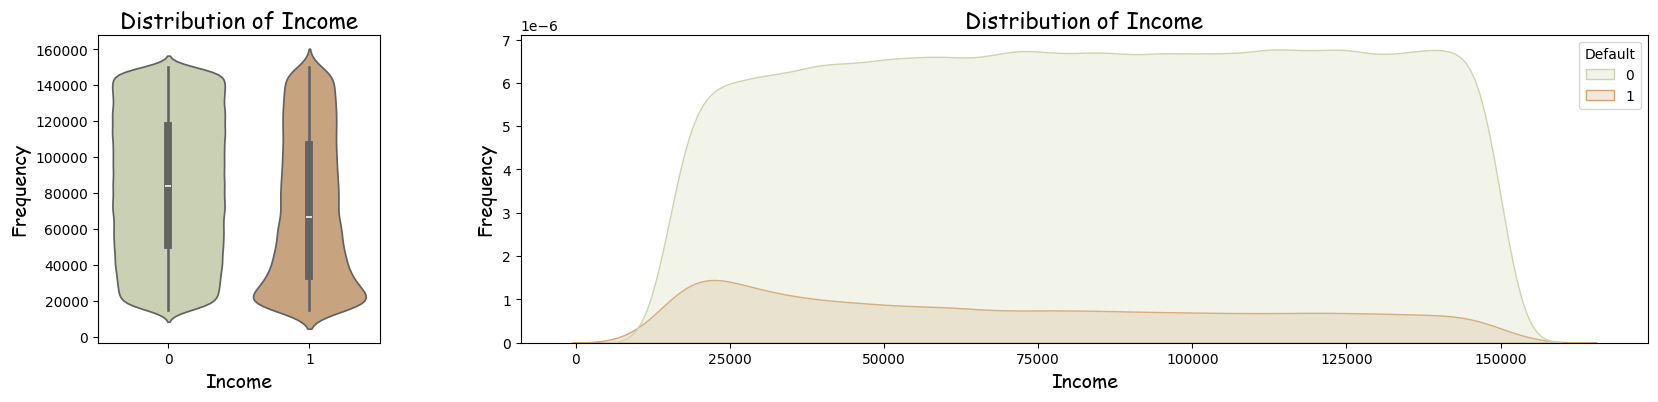

In [22]:
univariate_plot(train_df, "Income")

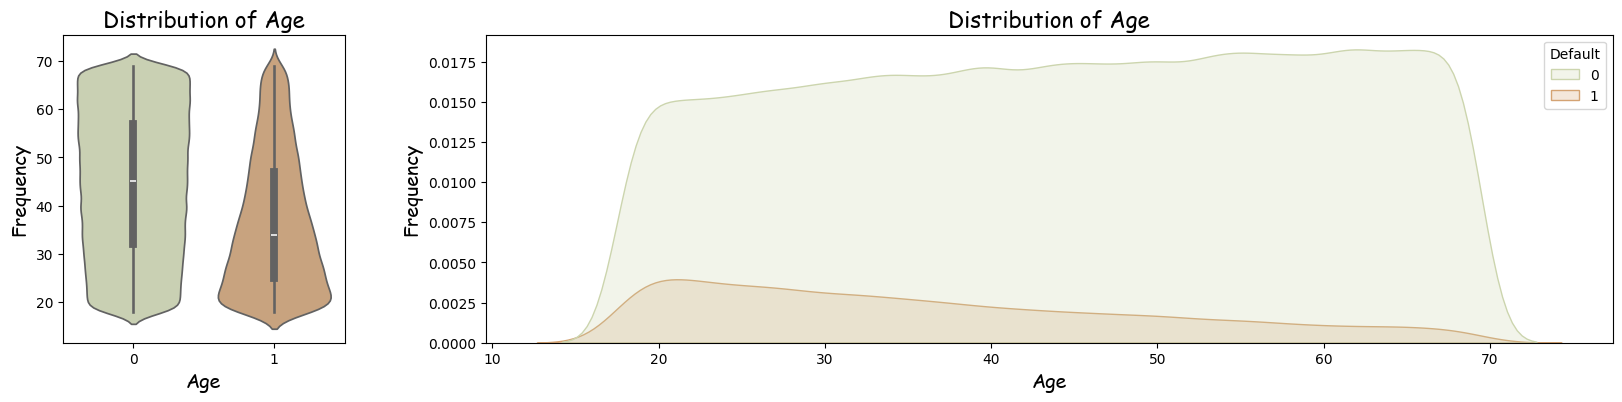

In [23]:
univariate_plot(train_df, "Age")

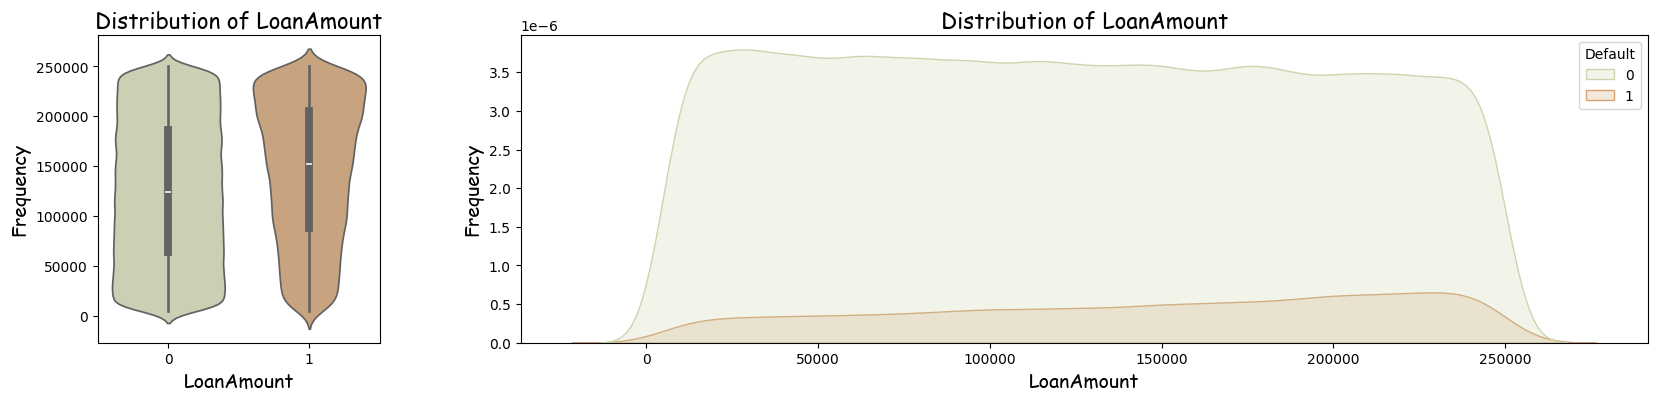

In [24]:
univariate_plot(train_df, "LoanAmount")

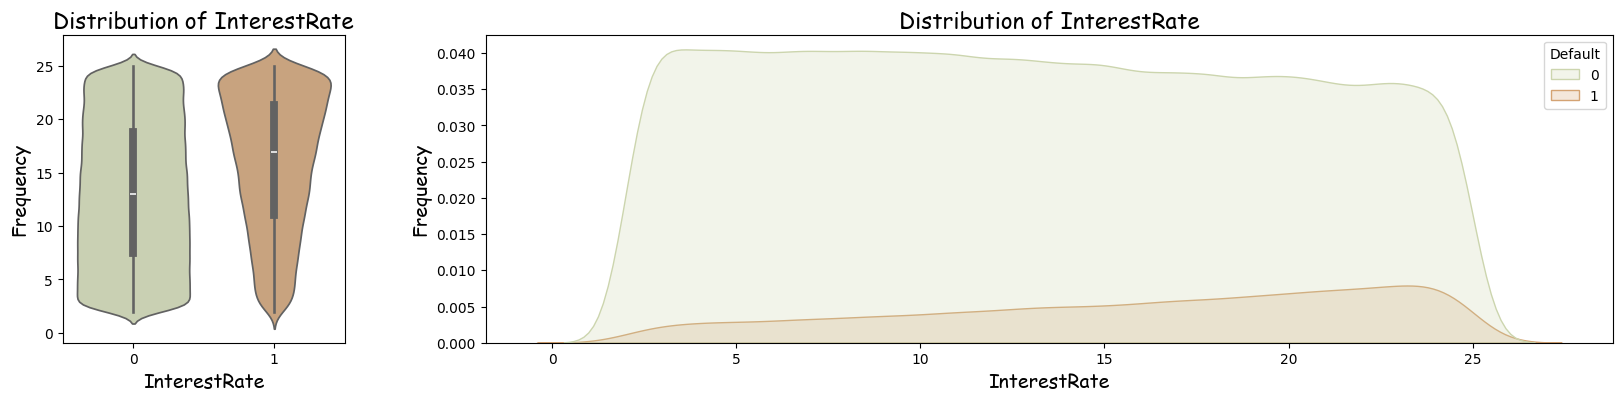

In [25]:
univariate_plot(train_df, "InterestRate")

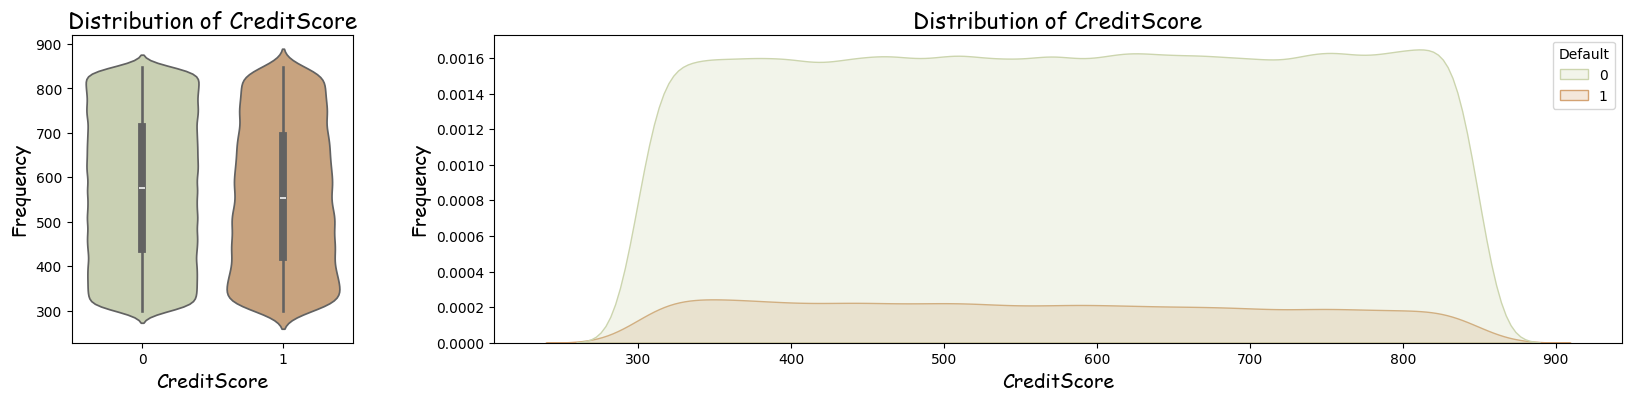

In [26]:
univariate_plot(train_df, "CreditScore")

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>Univariate Analysis - Conclusion</h3>    
    <ul>
        <li>Values</li>
        <ul>
            <li>HasCoSigner, HasDependents, HasMortgage are binary fields</li>
            <li>Education, EmploymentType, LoanPurpose, MaritalStatus are categorical data</li>
        </ul>            
        <li>Count</li>
        <ul>
            <li>DataSet is imbalanced</li>        
        </ul>
        <li>Outliers</li>
        <ul>
            <li>The data had no outliers</li>        
        </ul>
        <li>Features</li>
        <ul>
            <li>The Loan defaulters are high where interest rate or Loan Amount is High</li>        
            <li>Younger people or low income category too had more defaulters.</li>
            <li>Credit Score in general did not show any obvious trend.</li>
        </ul>
    </ul>    
</div>

<hr>
<div style="font-family: Calibri; font-size: 16px; background-color: #faedcd; padding: 5px 5px 5px 5px;">
    <h2>3. Bivariate Analysis</h2>
</div>

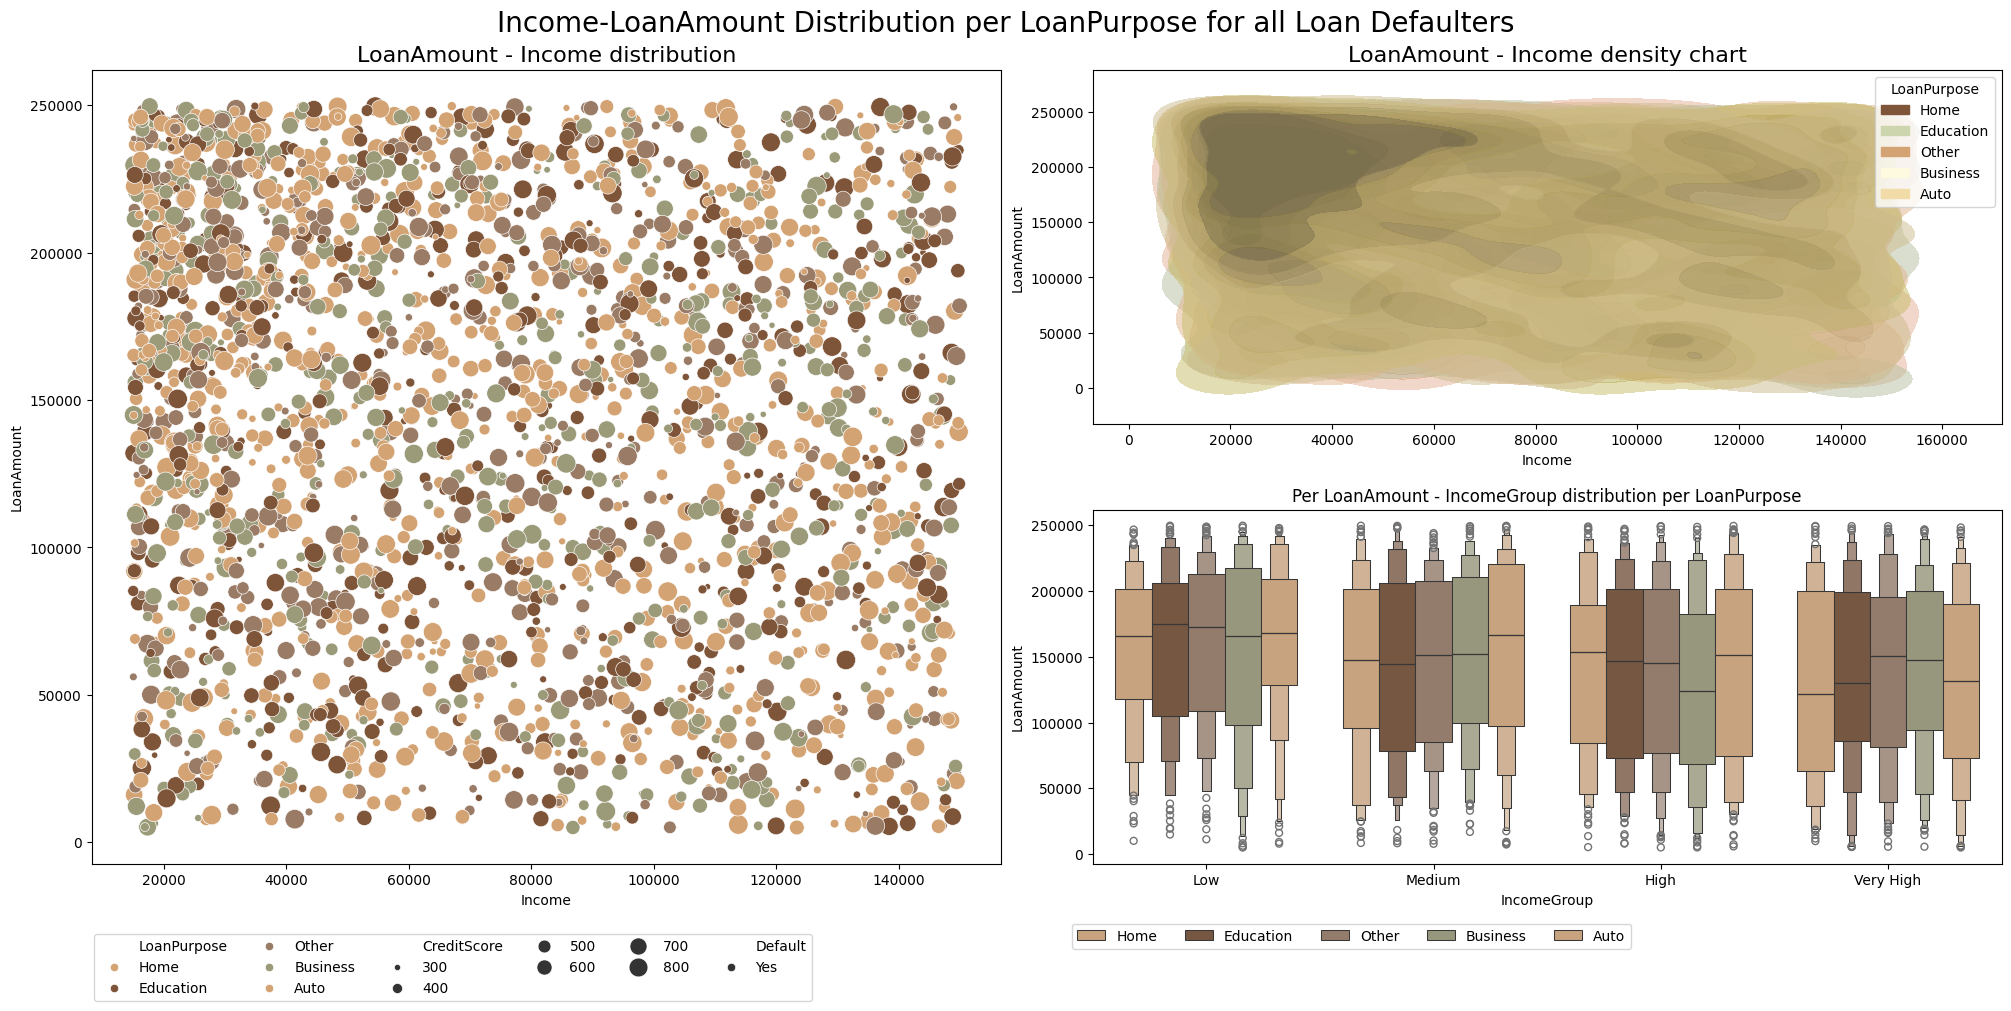

In [27]:
df = train_df.query('Default==1')
df = df.sample(2500)
df['IncomeGroup'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
bivariate_plots(df, 'Income', 'LoanAmount', _hue='LoanPurpose', _bg='IncomeGroup', title='Income-LoanAmount Distribution per LoanPurpose for all Loan Defaulters')

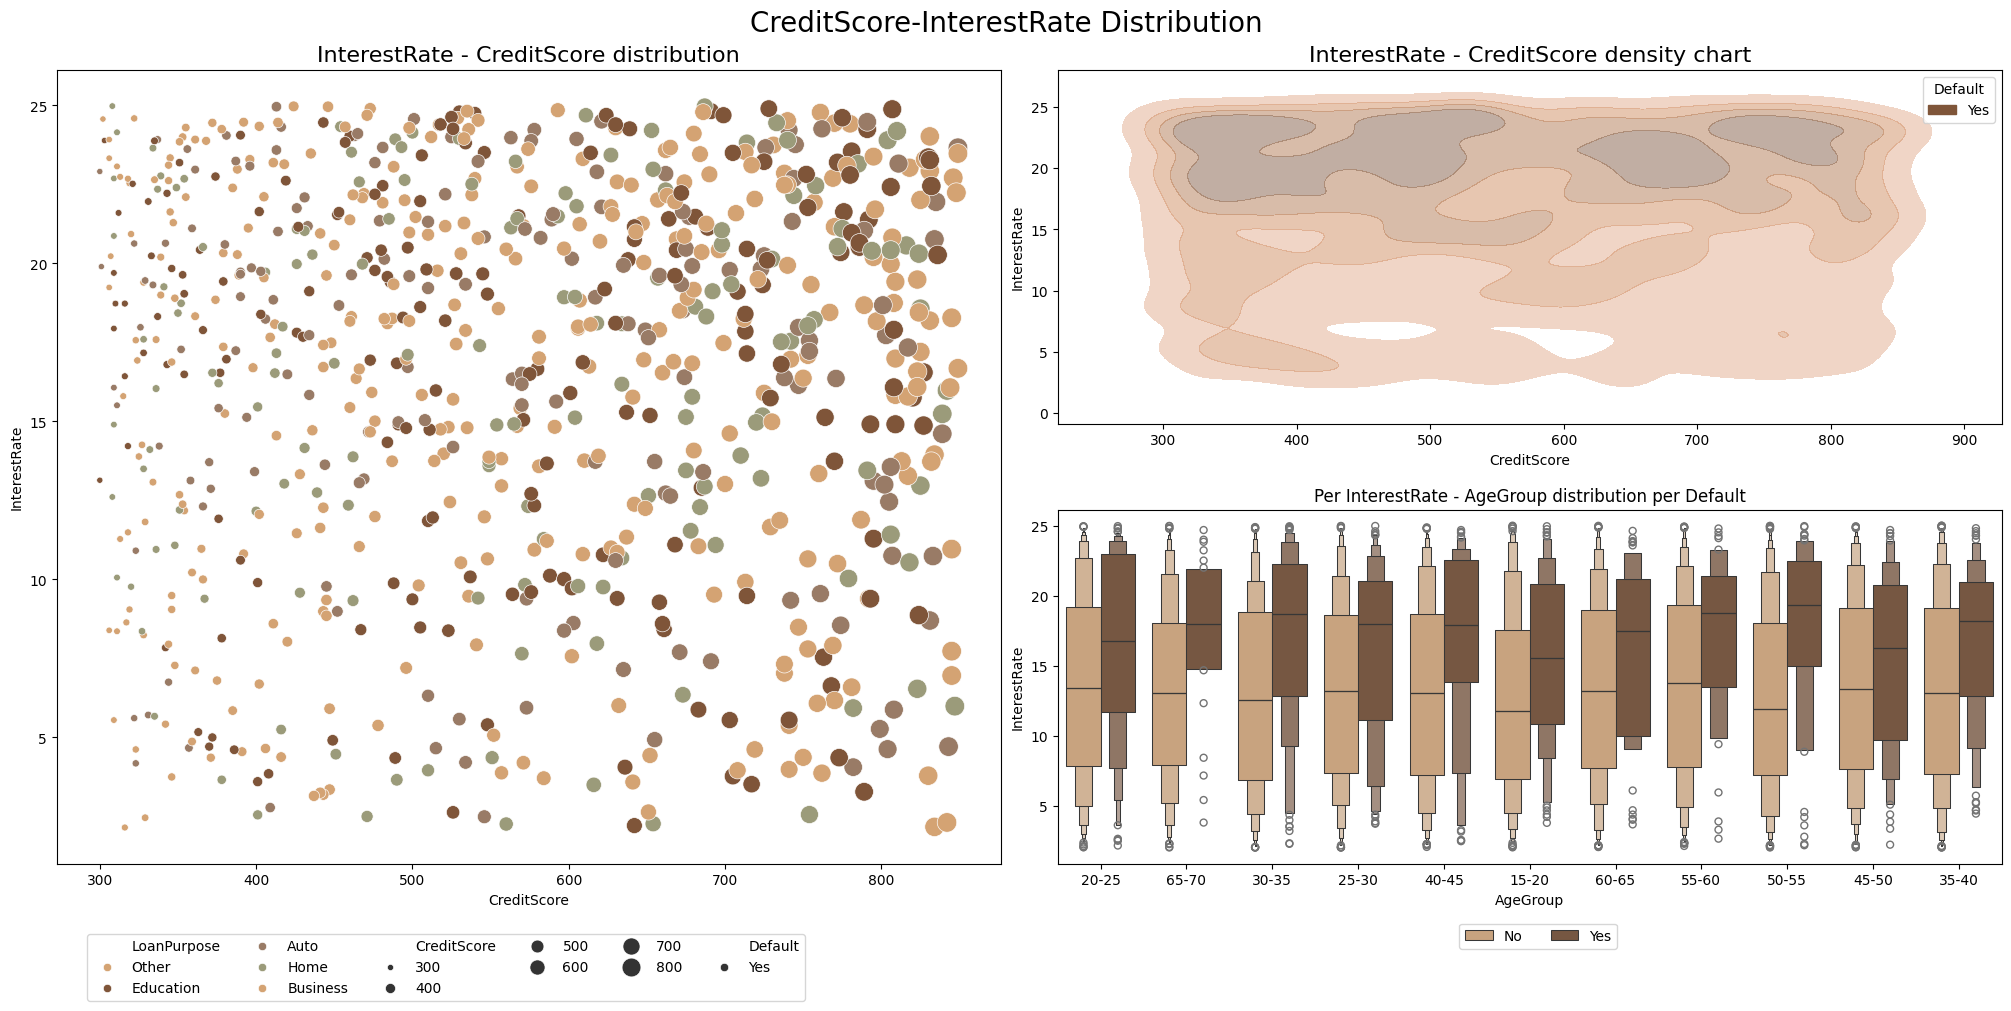

In [35]:
#df = train_df.query('Default==1')
df = train_df.sample(7500)

_min, _max = (min(df['Age'])//5)*5, ((max(df['Age'])//5)+1)*5
df['AgeGroup'] = pd.cut(df['Age'], bins=range(_min,_max+1,5), right=True).astype(str).str[1:-1].str.replace(', ','-')

bivariate_plots(df, 'CreditScore', 'InterestRate', _hue='Default', _bg='AgeGroup', title='CreditScore-InterestRate Distribution')

In [28]:
df.groupby(['LoanPurpose'])['LoanPurpose'].count().sort_values(ascending=False)

LoanPurpose
Business     544
Auto         529
Other        508
Education    506
Home         413
Name: LoanPurpose, dtype: int64

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>Bivariate Analysis - 1</h3>    
    <ul>
        <li>From random sample of 2500 Loan Defaulters</li>
        <ul>
            <li>Lower Income Group are the once who have taken Highest Loan.</li>
            <li>Highest Loan Defaulters have defaulted in Education, Auto and Business Loan.</li>
            <li>Number of loan Taken in each Income group for Each Loan purpose is almost.</li>
        </ul>                    
    </ul>           
</div>

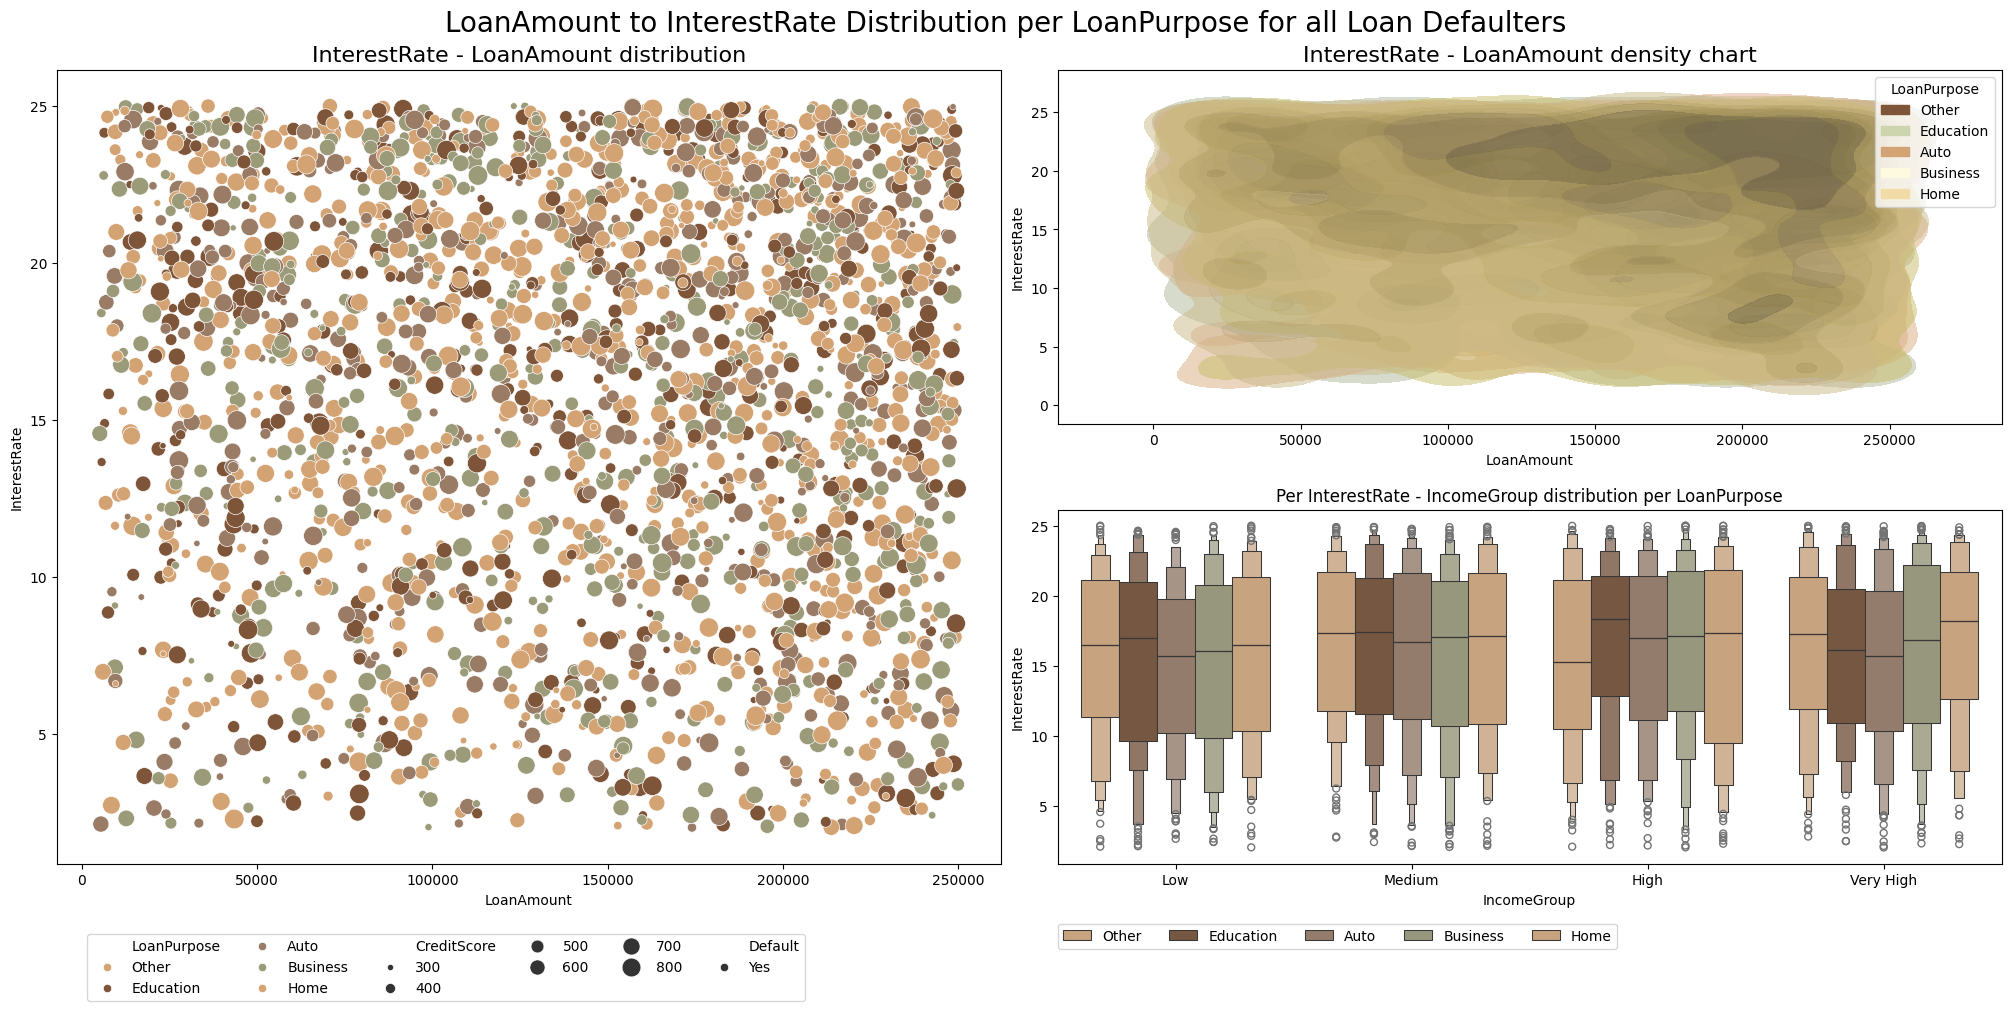

In [22]:
df = train_df.query('Default==1')
df = df.sample(2500)
df['IncomeGroup'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
bivariate_plots(df, 'LoanAmount', 'InterestRate', _hue='LoanPurpose', _bg='IncomeGroup', title='LoanAmount to InterestRate Distribution per LoanPurpose for all Loan Defaulters')

In [24]:
df.groupby(['LoanPurpose'])['LoanPurpose'].count().sort_values(ascending=False)

LoanPurpose
Business     582
Auto         508
Education    500
Other        480
Home         430
Name: LoanPurpose, dtype: int64

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>Bivariate Analysis - 2</h3>    
    <ul>
        <li>From random sample of 2500 Loan Defaulters</li>
        <ul>
            <li>As expected, the High Interest, Higher Amount Loan defaulters are higher,</li>
            <li>Highest Loan Defaulters have defaulted in Education, Auto and Business Loan.</li>
        </ul>                    
    </ul>           
</div>

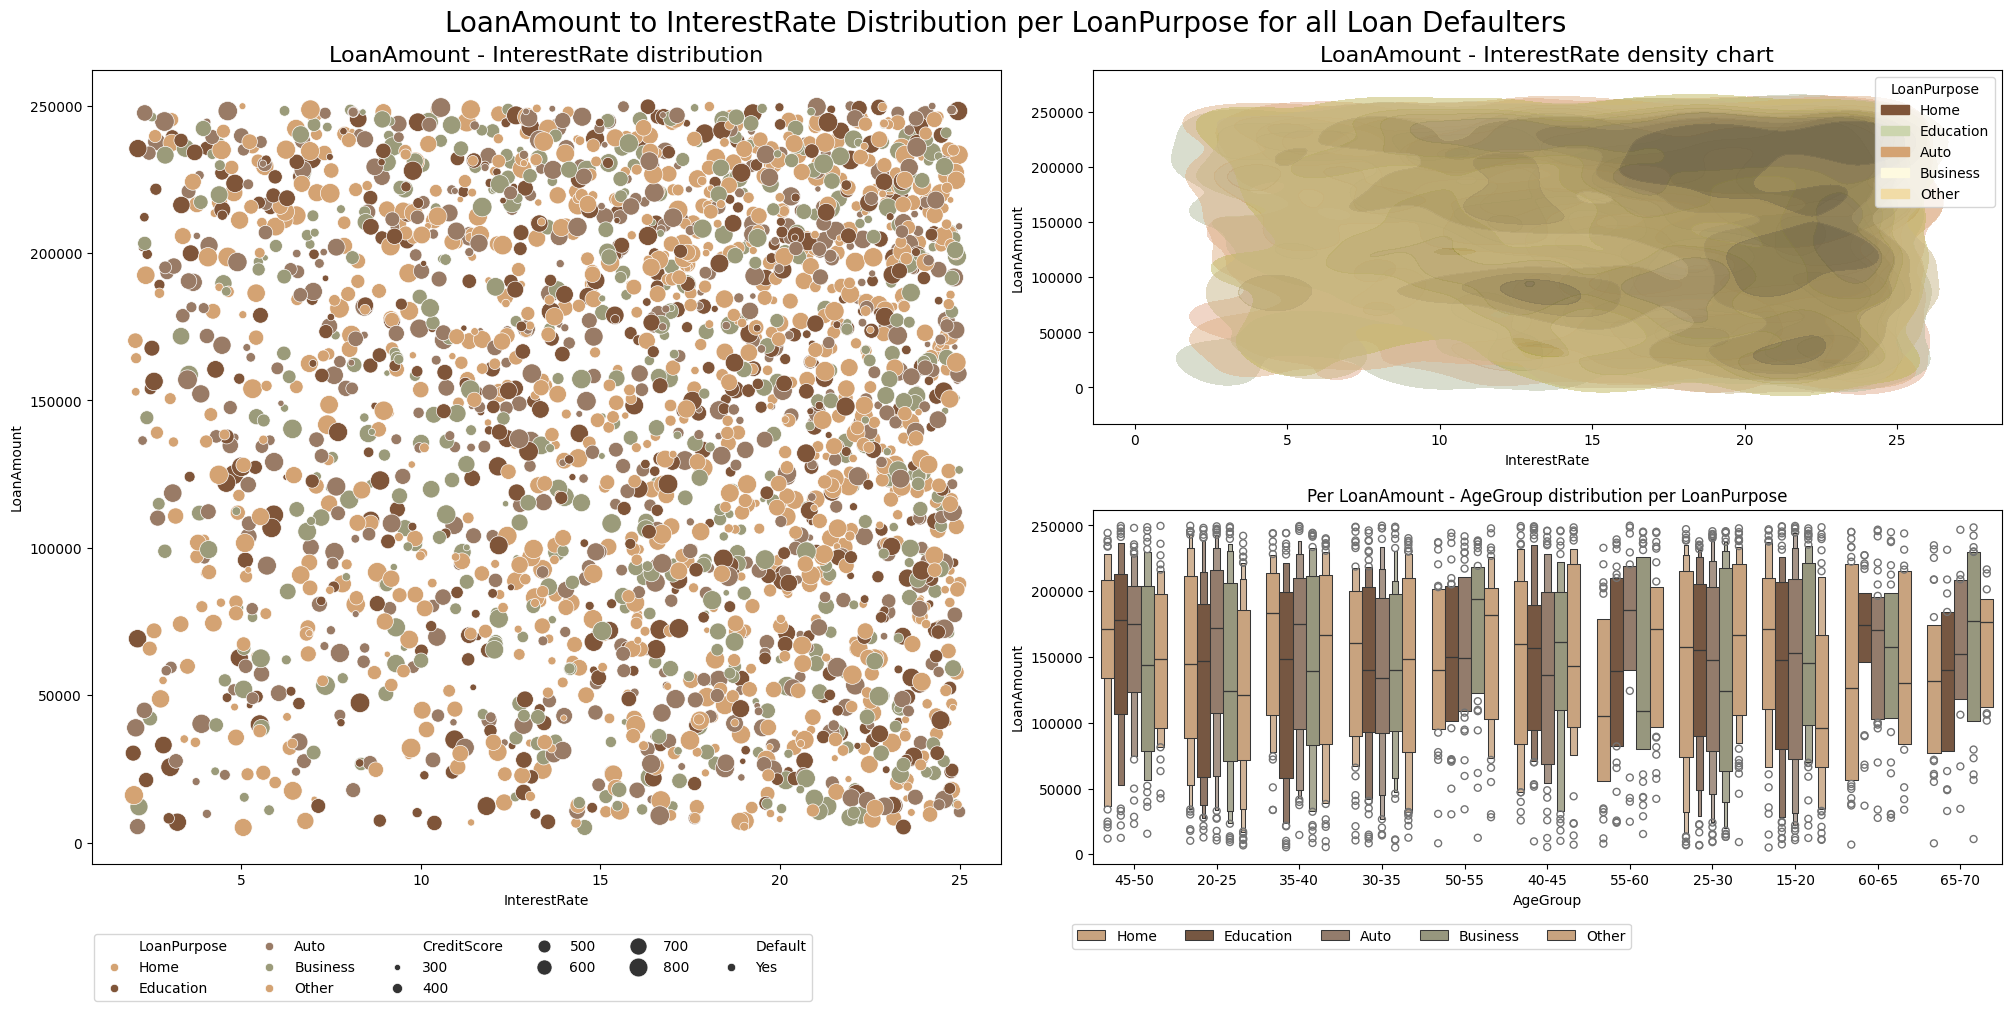

In [23]:
df = train_df.query('Default==1')
df = df.sample(2500)

_min, _max = (min(df['Age'])//5)*5, ((max(df['Age'])//5)+1)*5
df['AgeGroup'] = pd.cut(df['Age'], bins=range(_min,_max+1,5), right=True).astype(str).str[1:-1].str.replace(', ','-')
bivariate_plots(df,  'InterestRate','LoanAmount', _hue='LoanPurpose', _bg='AgeGroup', title='LoanAmount to InterestRate Distribution per LoanPurpose for all Loan Defaulters')

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>Bivariate Analysis - 3</h3>    
    <ul>
        <li>From random sample of 2500 Loan Defaulters</li>
        <ul>
            <li>Variation of (Bivariate Analysis - 2), It was seen Younger people have defaulted in Loan most, in all category </li>            
        </ul>                    
    </ul>           
</div>

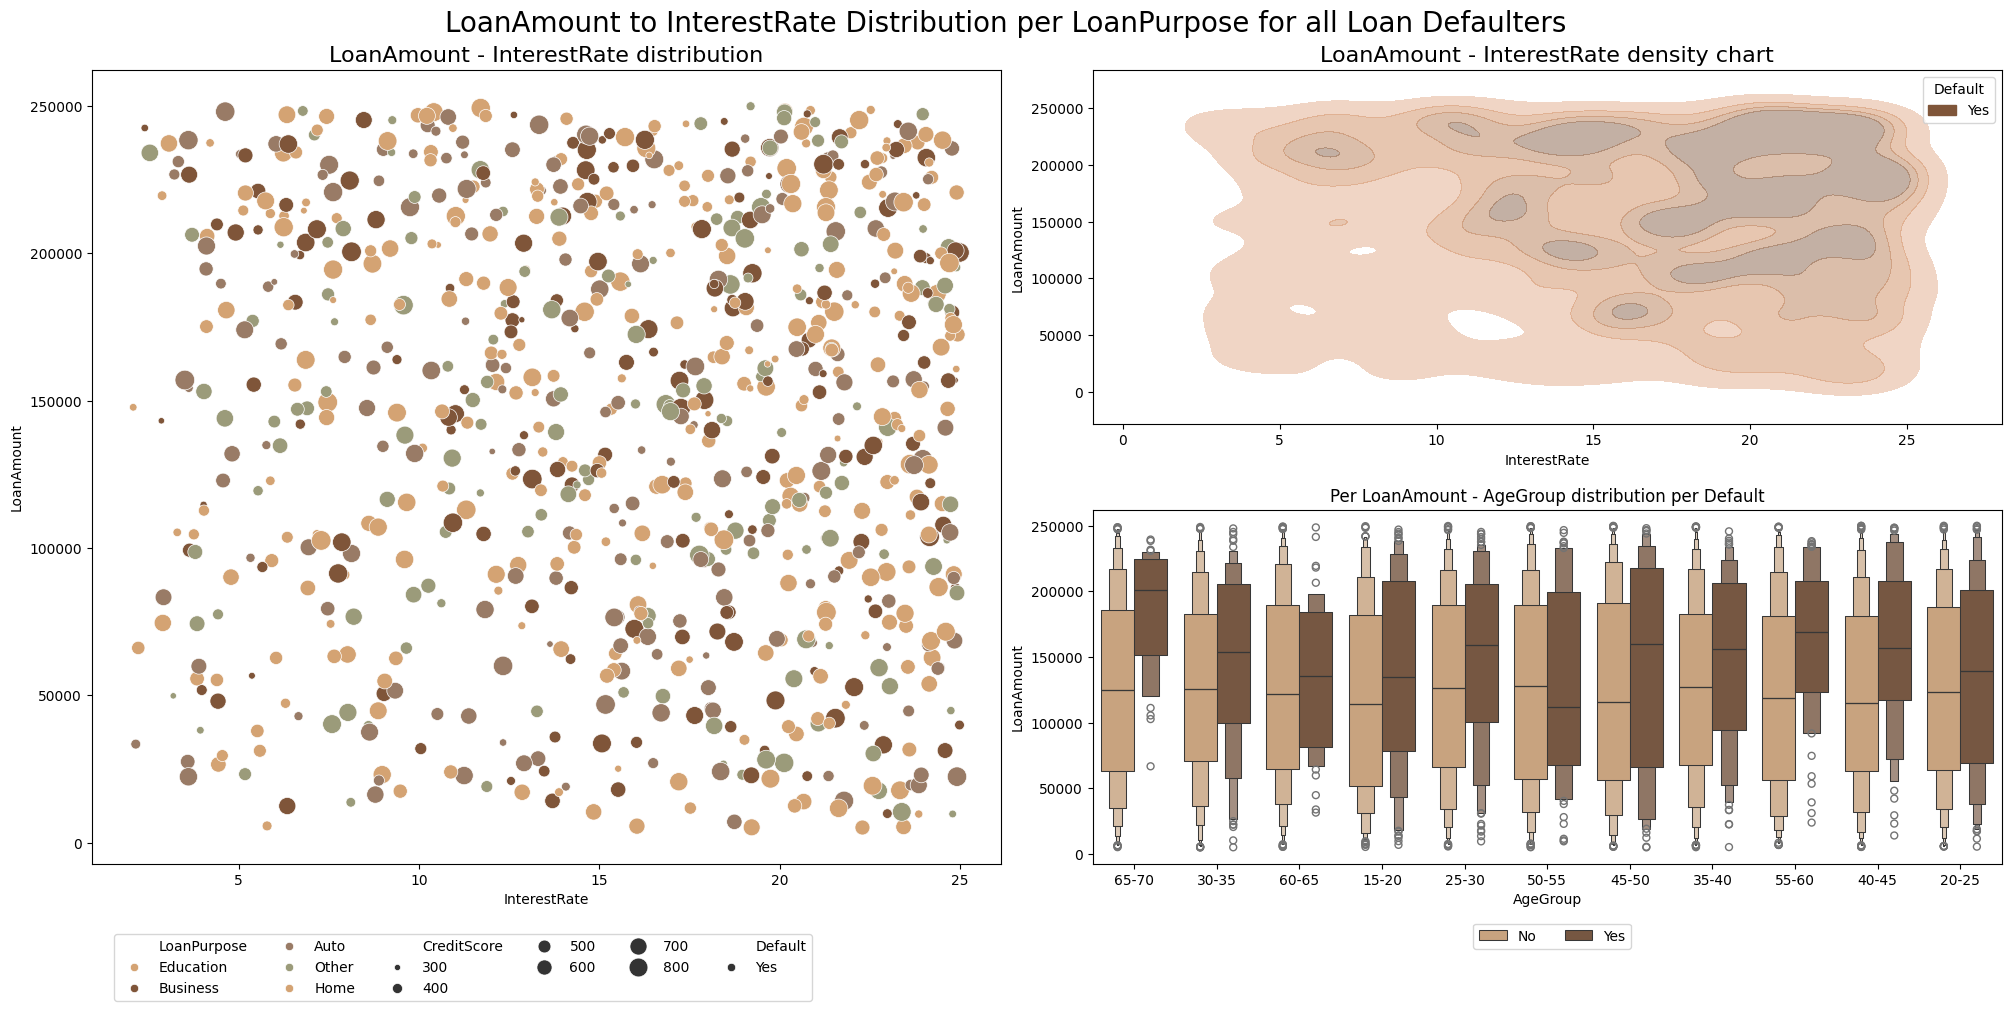

In [26]:
df = train_df
df = df.sample(7500)

_min, _max = (min(df['Age'])//5)*5, ((max(df['Age'])//5)+1)*5
df['AgeGroup'] = pd.cut(df['Age'], bins=range(_min,_max+1,5), right=True).astype(str).str[1:-1].str.replace(', ','-')
bivariate_plots(df,  'InterestRate','LoanAmount', _hue='Default', _bg='AgeGroup', title='LoanAmount to InterestRate Distribution per LoanPurpose for all Loan Defaulters')

<hr>
<div style="font-family: Calibri; font-size: 16px; background-color: #faedcd; padding: 5px 5px 5px 5px;">
    <h2>4. MultiVariate Analysis</h2>
</div>

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>MultiVariate - (LoanAmount/Education)</h3>
    <ul>
        <li>LoanAmount - continuous variable </li>
        <li>Education - categorical data</li>
        <li>Default - categorical data, <u>target</u></li>
    </ul>            
</div>    

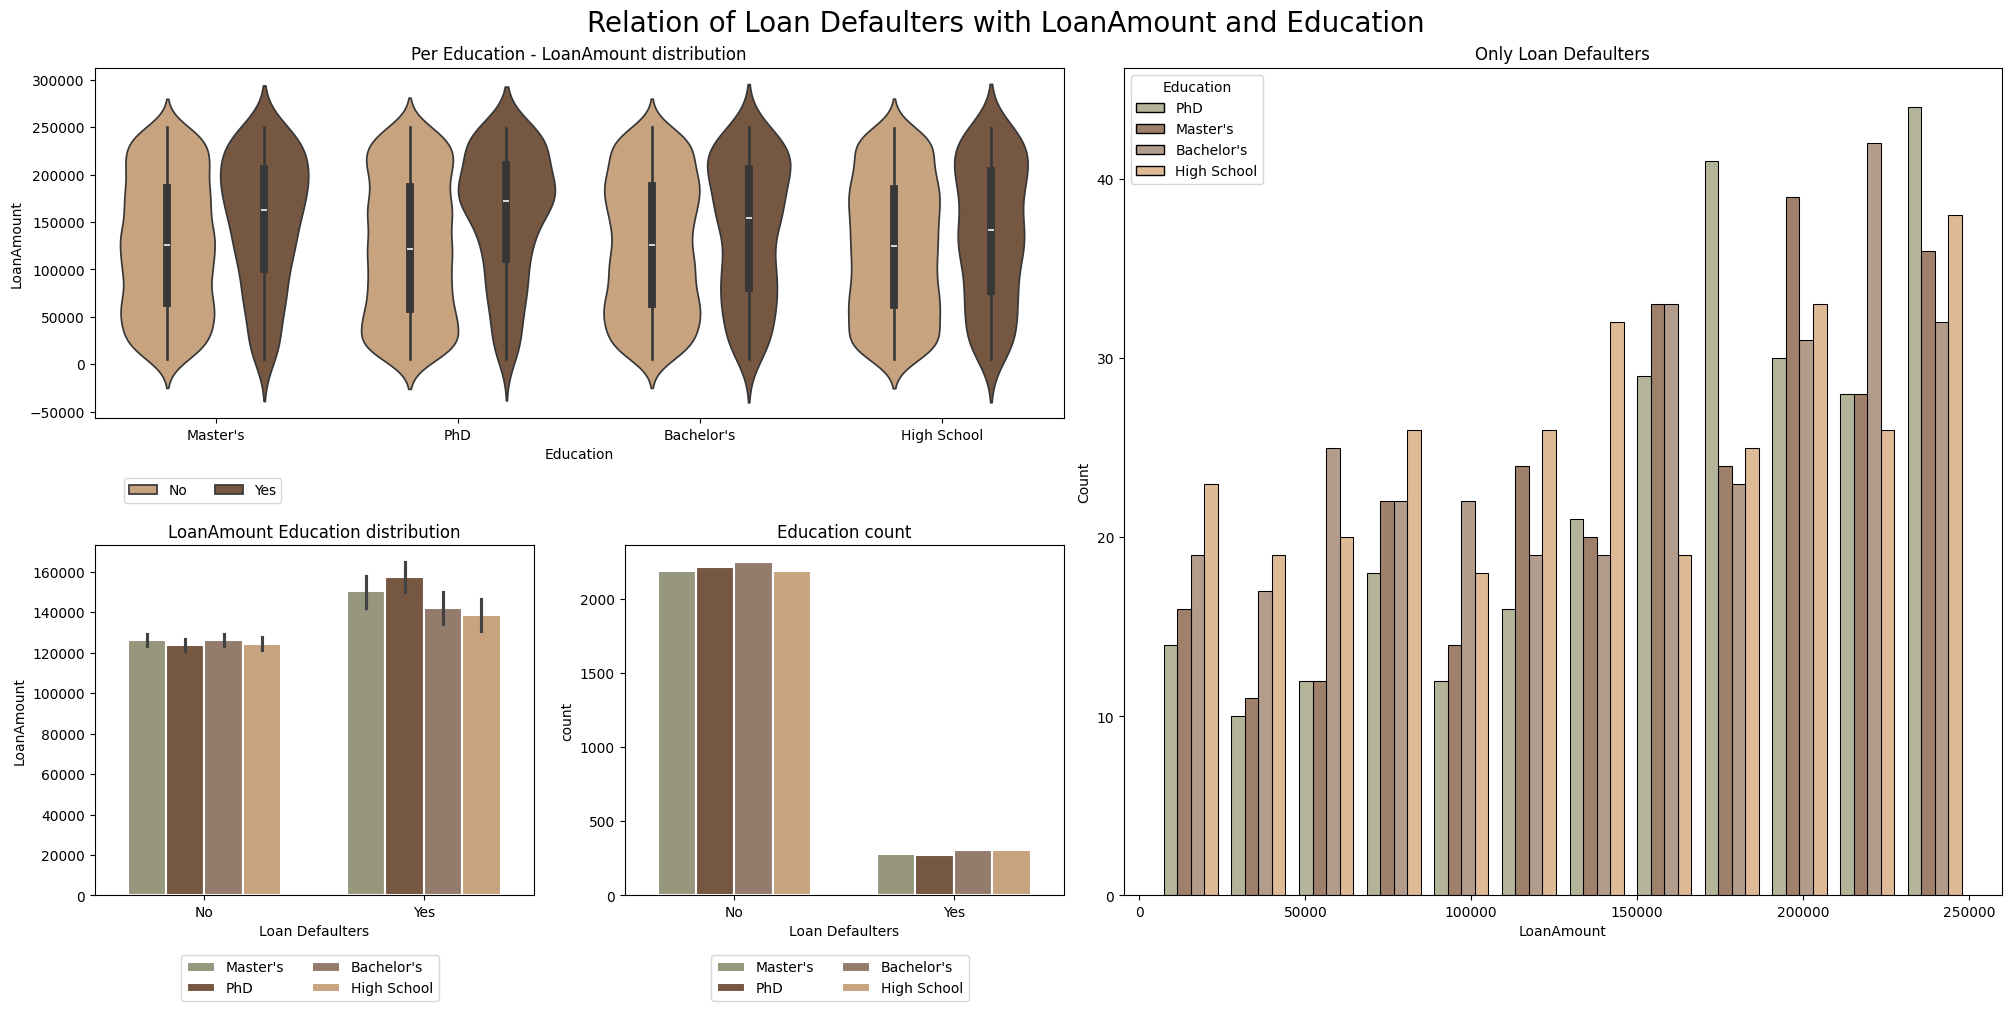

In [27]:
bivariate_gridplot_alpha(train_df.sample(10000), _x="LoanAmount", _y="Education", _hue="Default")

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>MultiVariate - (Loan Amount/Employment Type)</h3>
    <ul>
        <li>LoanAmount - continuous variable </li>
        <li>EmploymentType - categorical data</li>
        <li>Default - categorical data, <u>target</u></li>
    </ul>            
</div>    

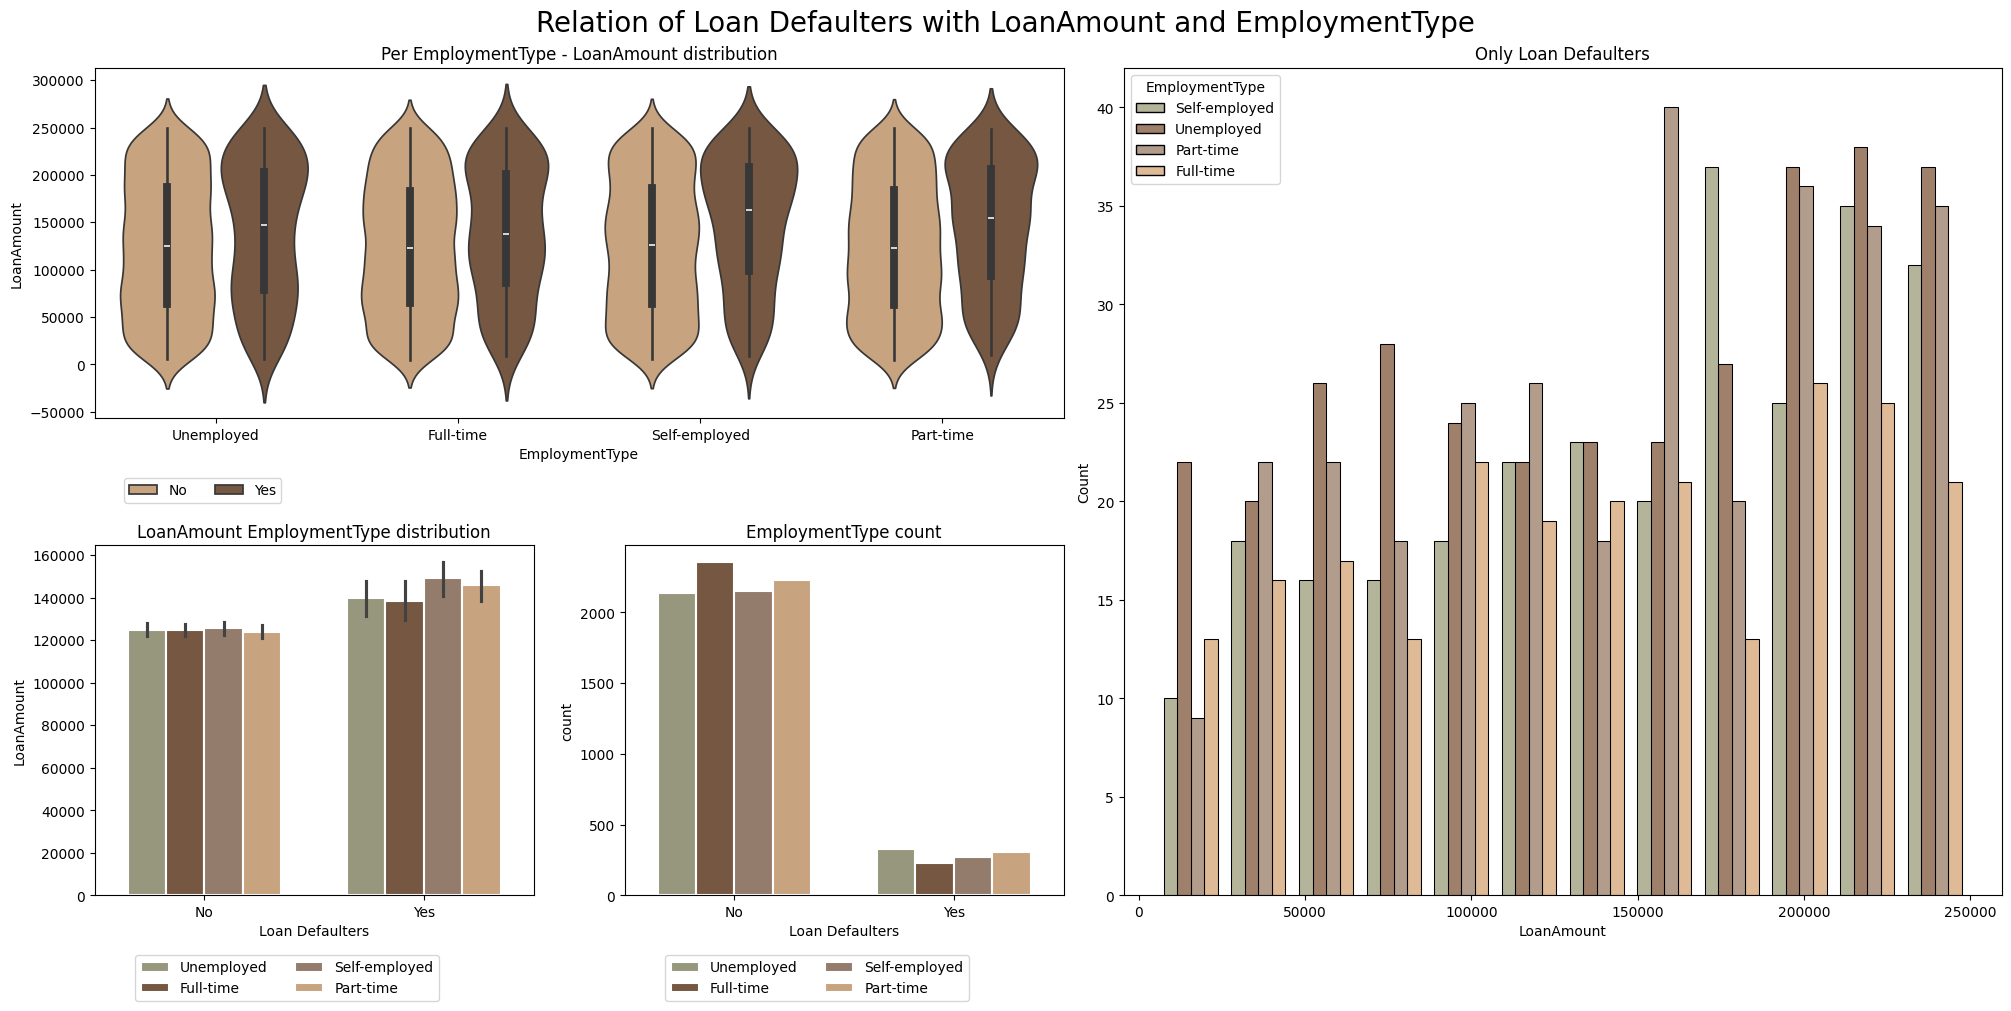

In [28]:
bivariate_gridplot_alpha(train_df.sample(10000), _x="LoanAmount", _y="EmploymentType", _hue="Default")

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>MultiVariate - (LoanAmount/LoanTerm)</h3>
    <ul>
        <li>LoanAmount - continuous variable </li>
        <li>LoanTerm - categorical data</li>
        <li>Default - categorical data, <u>target</u></li>
    </ul>            
</div>    

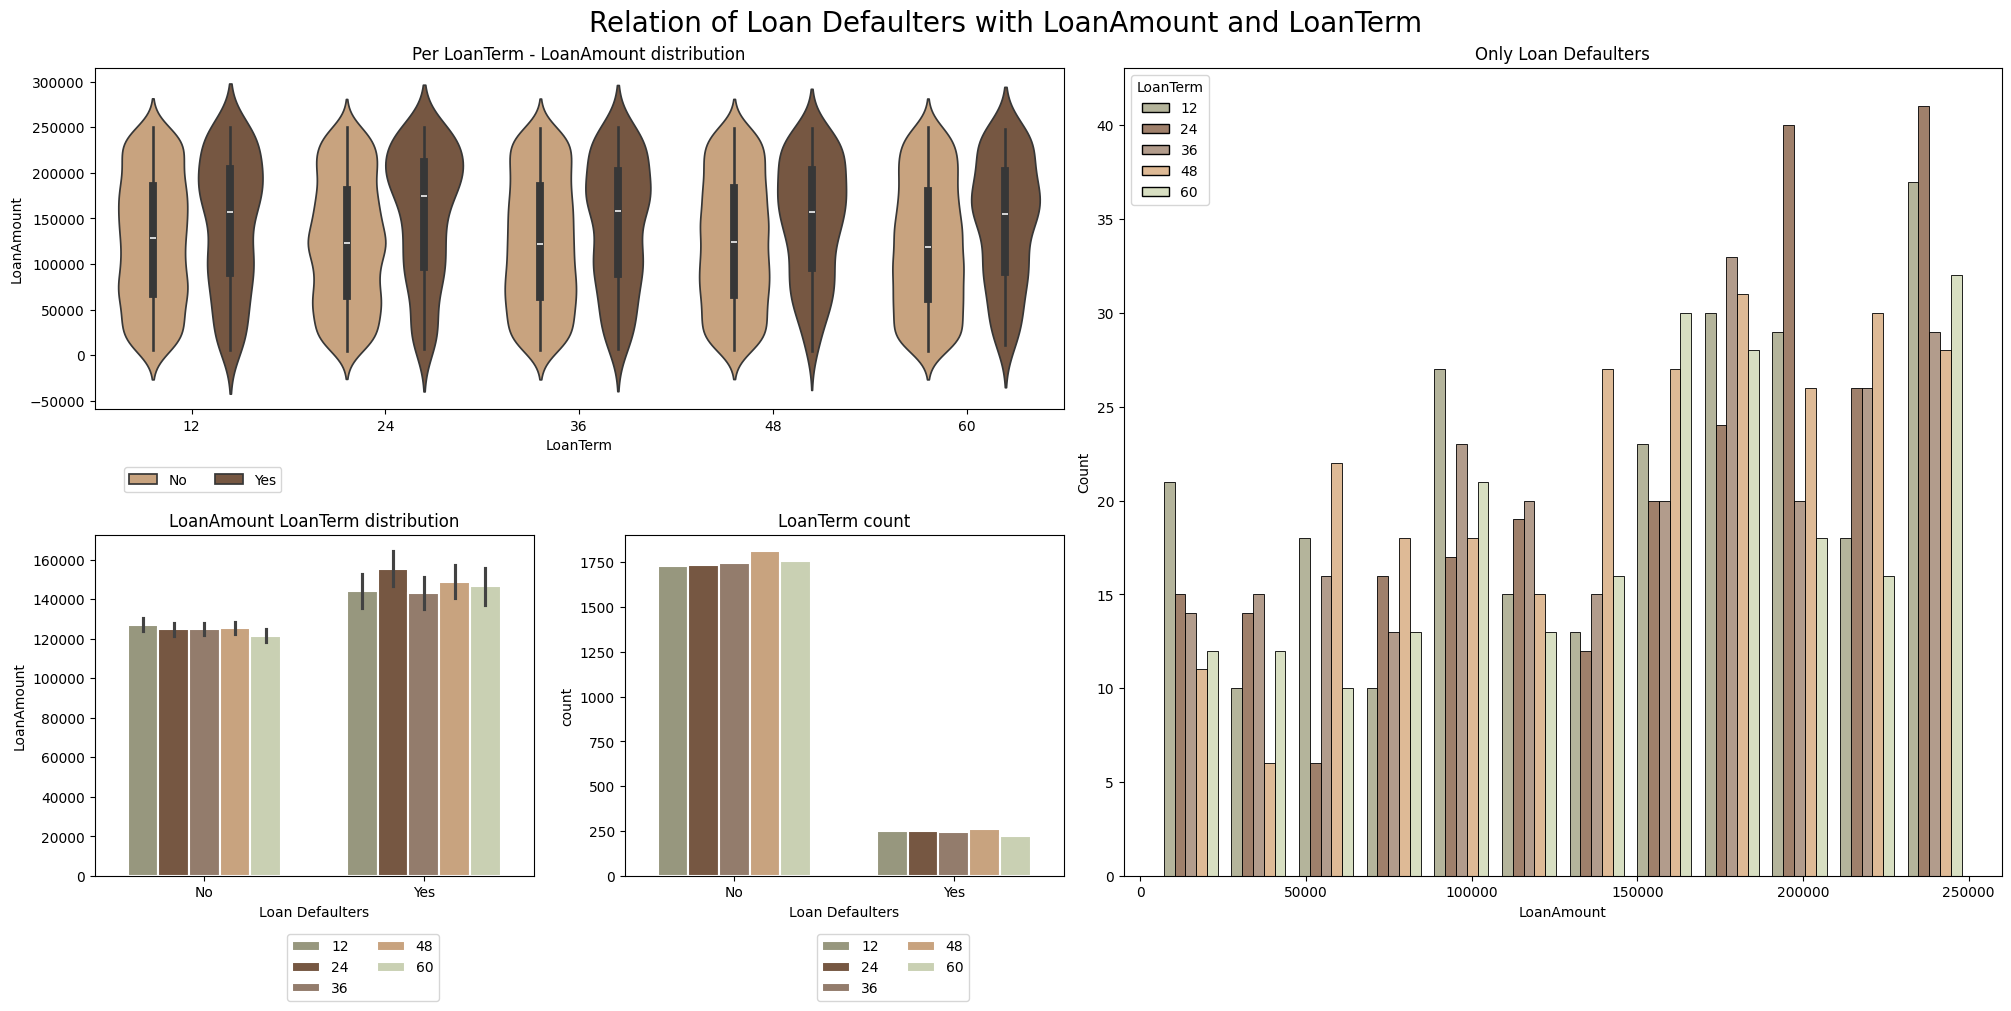

In [29]:
bivariate_gridplot_alpha(train_df.sample(10000), _x="LoanAmount", _y="LoanTerm", _hue="Default")

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>MultiVariate - (LoanAmount/LoanPurpose)</h3>
    <ul>
        <li>LoanAmount - continuous variable </li>
        <li>LoanPurpose - categorical data</li>
        <li>Default - categorical data, <u>target</u></li>
    </ul>            
</div>  

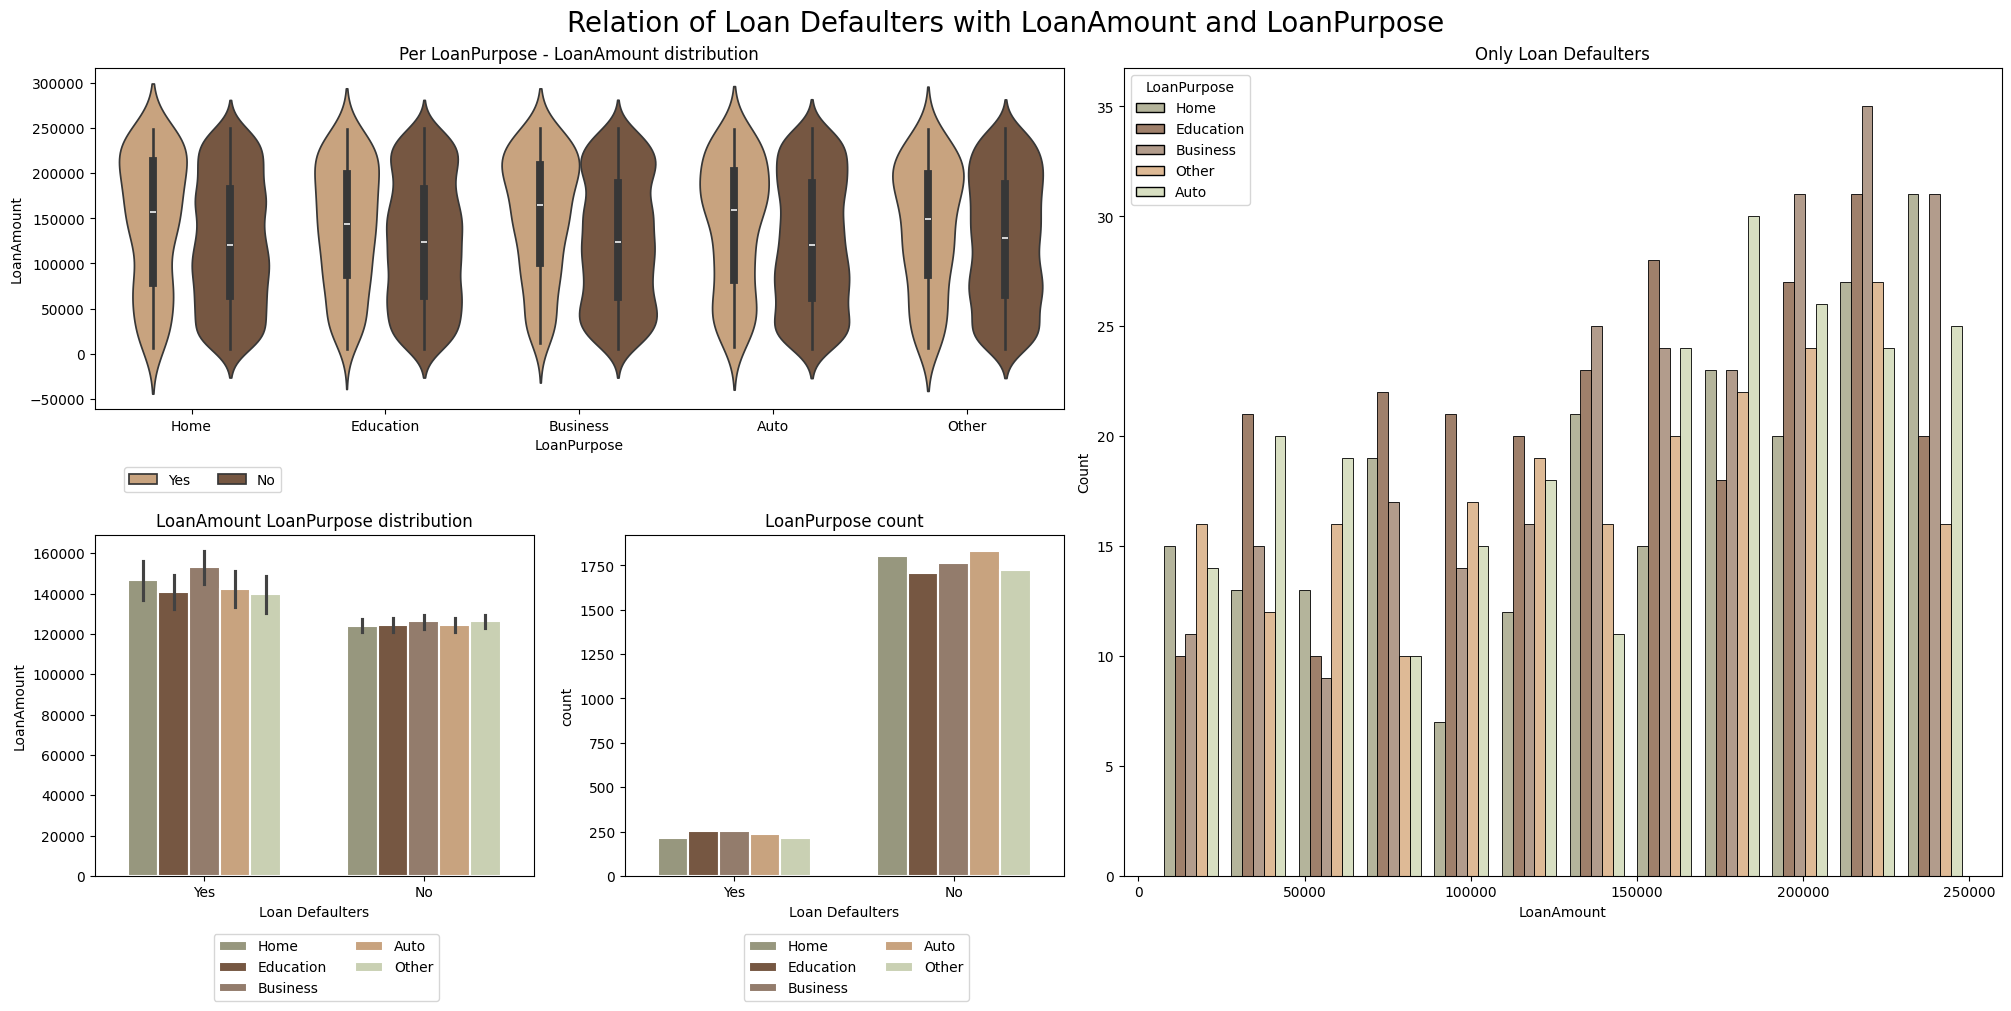

In [30]:
bivariate_gridplot_alpha(train_df.sample(10000), _x="LoanAmount", _y="LoanPurpose", _hue="Default")

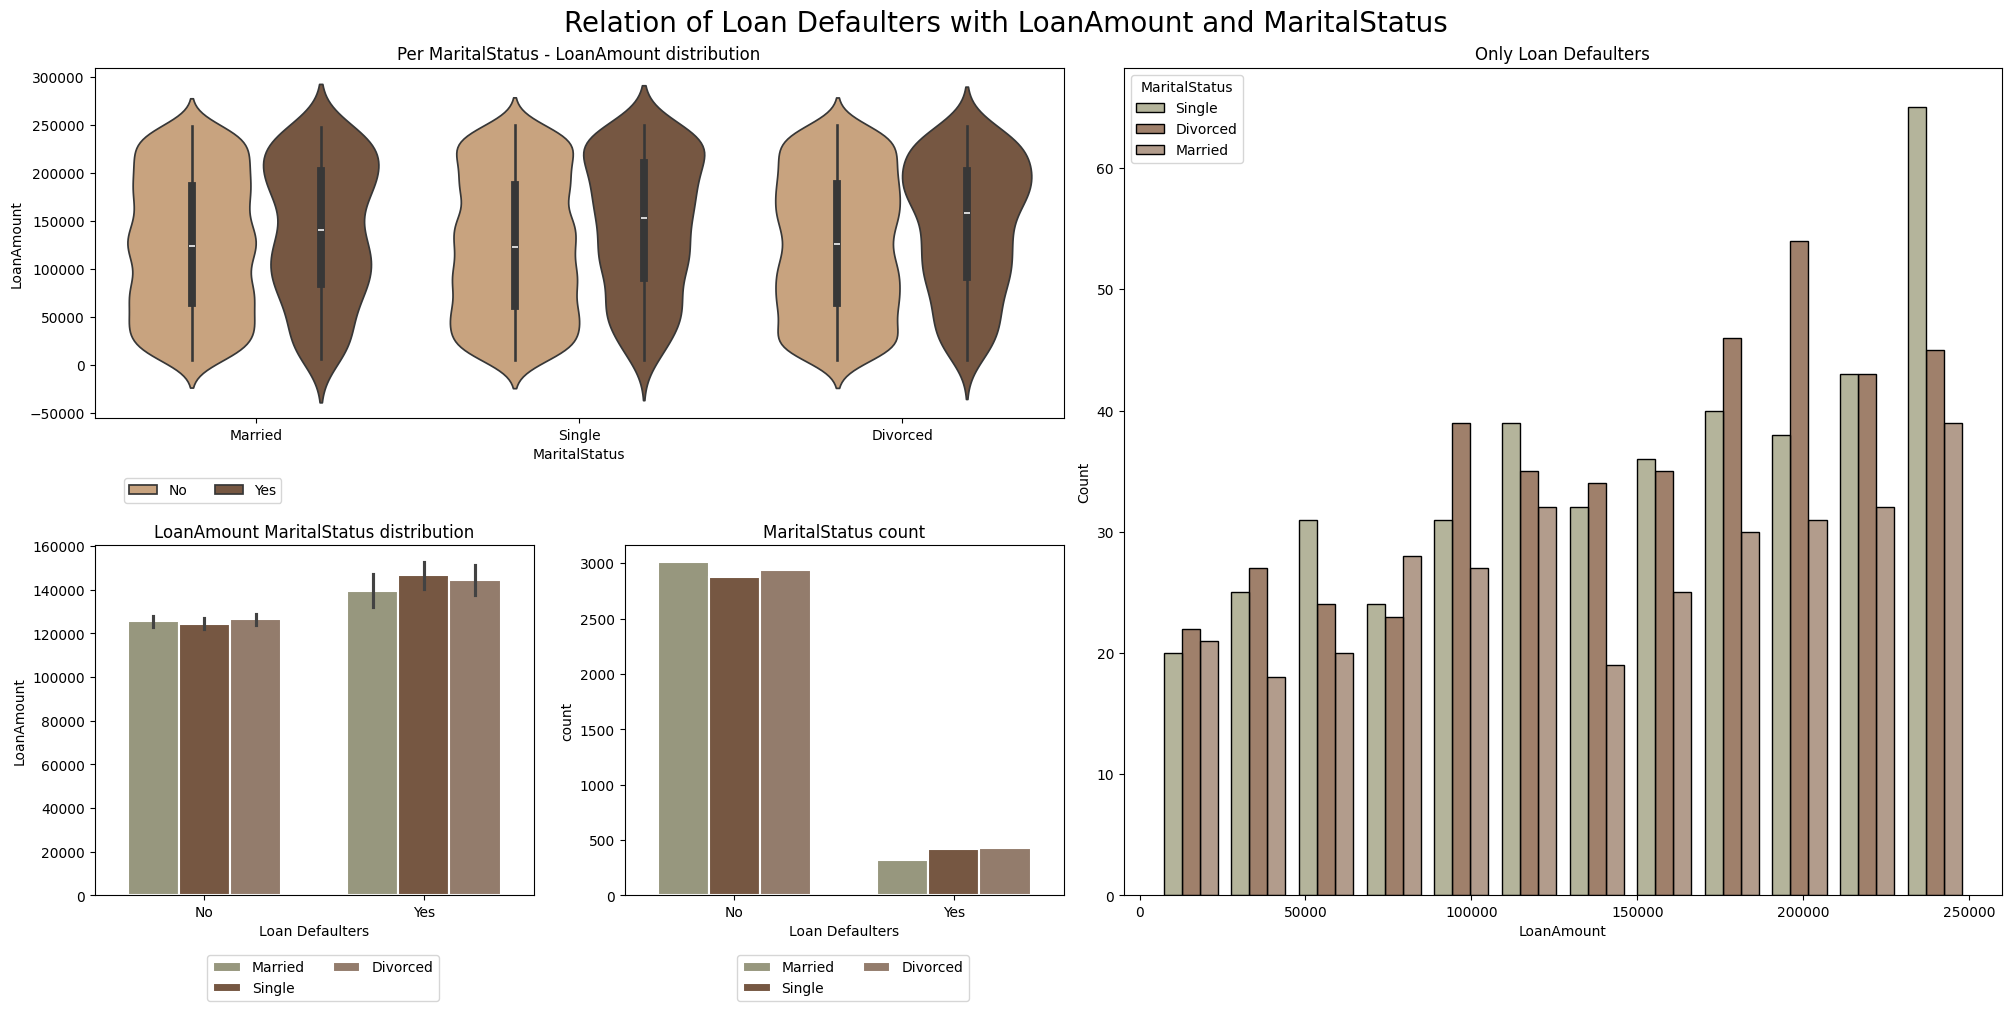

In [31]:
bivariate_gridplot_alpha(train_df.sample(10000), _x="LoanAmount", _y="MaritalStatus", _hue="Default")

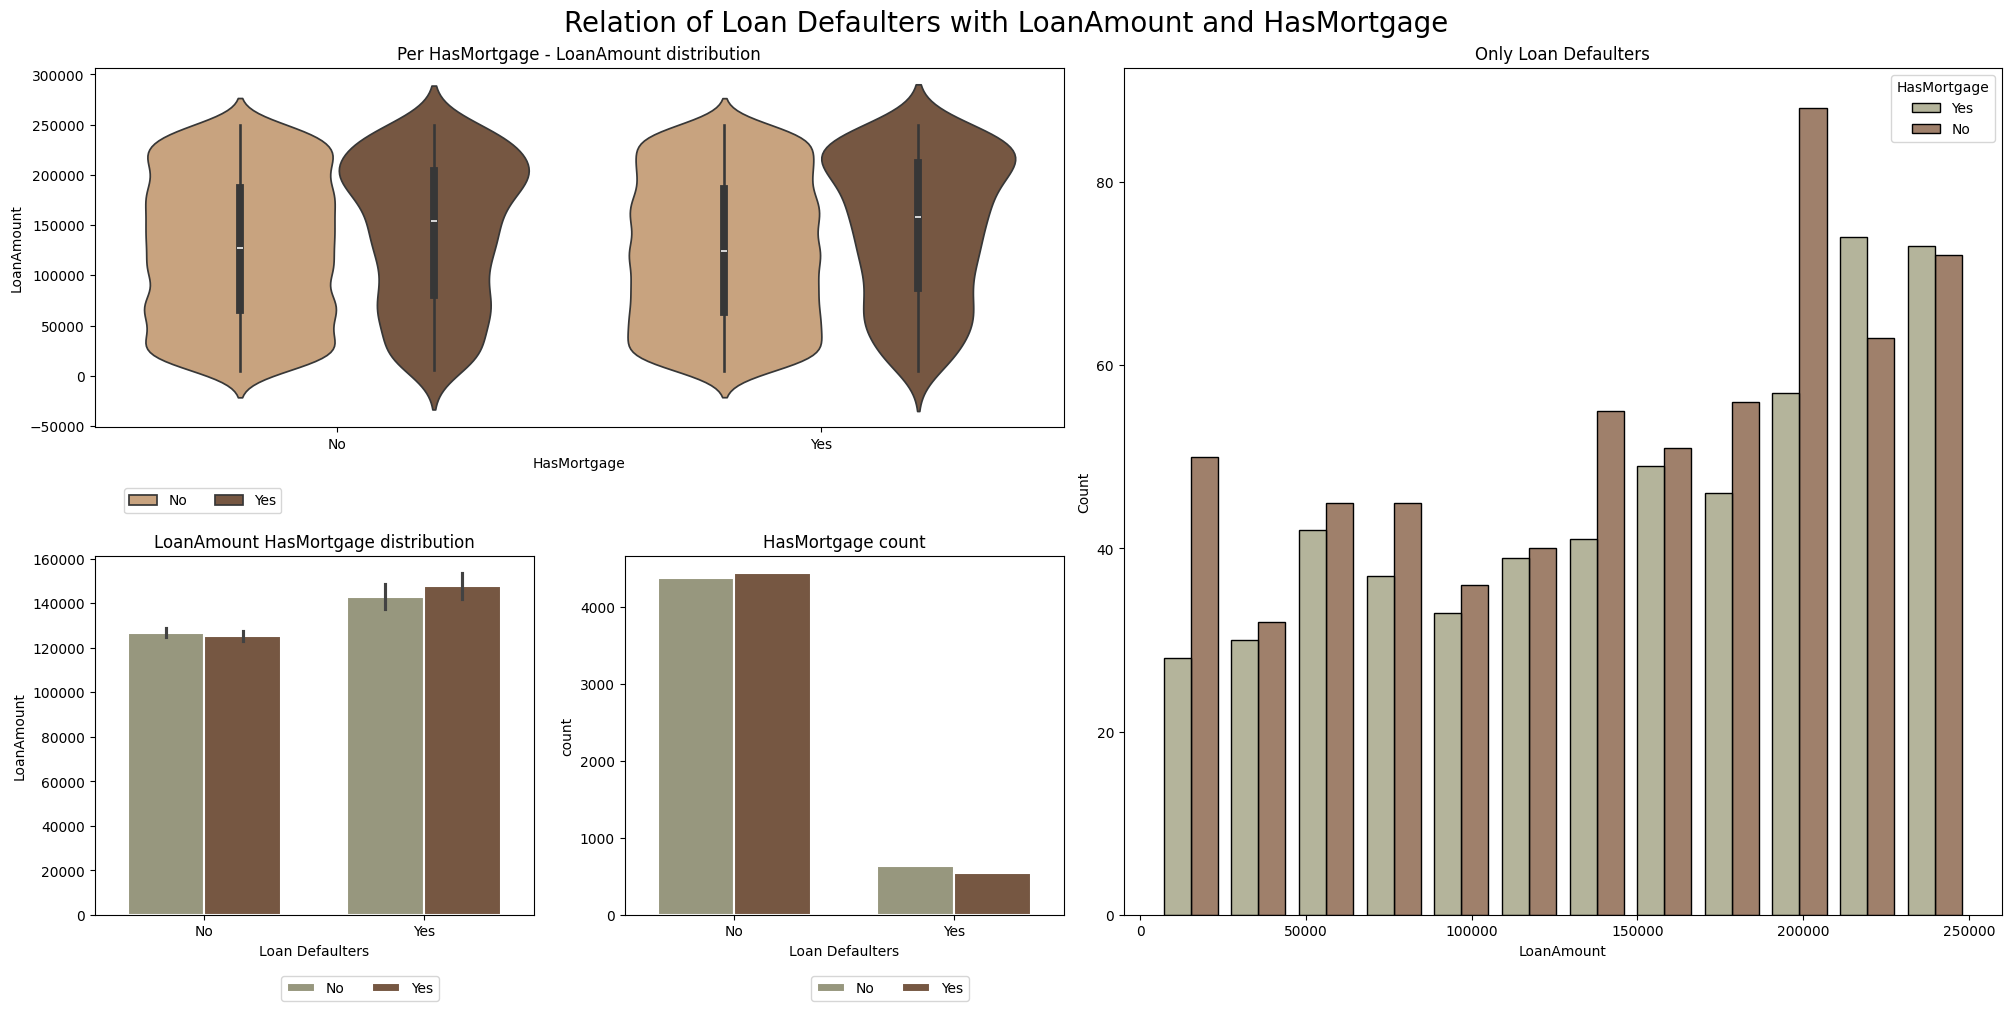

In [32]:
bivariate_gridplot_alpha(train_df.sample(10000), _x="LoanAmount", _y="HasMortgage", _hue="Default")

In [31]:
labels = ['5-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45','46-50', '51-55', '56-60', '61-65','66-70', '71-75','76-80', '81-85',]
train_df['age_group'] = pd.cut(df['Age'], bins=range(5,90,5), labels=labels, right=False)

<hr>
<div style="font-family: Calibri; font-size: 16px; background-color: #faedcd; padding: 5px 5px 5px 5px;">
    <h2>5. Outliers</h2>
</div>

In [35]:
from scipy import stats				

In [36]:
df_zscore = train_df[np.abs(stats.zscore(train_df['Income'])) < 3].copy()				

In [37]:
len(df_zscore)/len(train_df)*100				

100.0

In [38]:
df_zscore = train_df[np.abs(stats.zscore(train_df['LoanAmount'])) < 3].copy()				

In [39]:
len(df_zscore)/len(train_df)*100		

100.0

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>Outliers - Conclusion</h3>
    <ul>
        <li>No Outliers in Income and LoanAmount Category </li>
    </ul>            
</div>  